In [2]:
from AutoAlpha import autoalpha as aa
from AutoAlpha.utils.show_info_in_traning import *
import numpy as np
import pandas as pd
import pickle
# from pympler.asizeof import asizeof
from copy import deepcopy

In [3]:
with open("../../data/us_data_2017_2023.pkl", "rb") as f:
    data = pickle.load(f)
with open("../../data/us_return_2017_2023.pkl", "rb") as f:
    y = pickle.load(f)
print(data["open"].shape)
print(y.shape)

(1449, 503)
(1449, 503)


In [4]:
train_x = {}
train_y = None
for idx, dat in data.items():
    train_x[idx] = dat.values
train_y = y.values
is_dataset = aa.Dataset(train_x, train_y)
aa.set_dataset(dataset=is_dataset)

In [5]:
aa.set_use_parallel(True)
aa.set_d_ls([2, 3, 5, 7, 10, 15, 20])
aa.set_balance_mode(True)
aa.set_tournament_size(1)
aa.set_metric(aa.WQF)
aa.set_low_memory(False)
print(aa.get_n_jobs())

64


2368


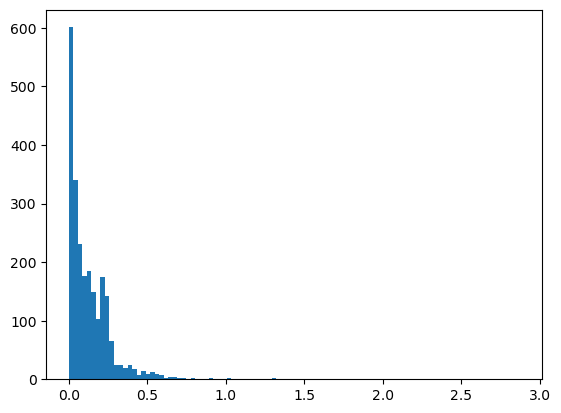

In [8]:
program1 = aa.traversal()
# program1 = aa.random_generate(population_size=10)
print(len(program1))
show_distribution(program1)
save_programs(programs=program1, path="program1.pkl")

In [9]:
program1 = load_programs(path="program1.pkl")

In loop 1 : 585 programs remains, reduce 75.29560810810811% .
450


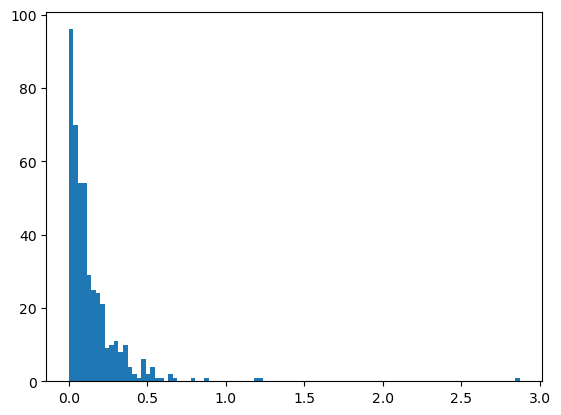

In [10]:
program1_corr = aa.corr_filter(programs=program1, threshold=0.7, verbose=True)
print(len(program1_corr))
show_distribution(program1_corr)

In loop 1 : 585 programs remains, reduce 75.29560810810811% .
450


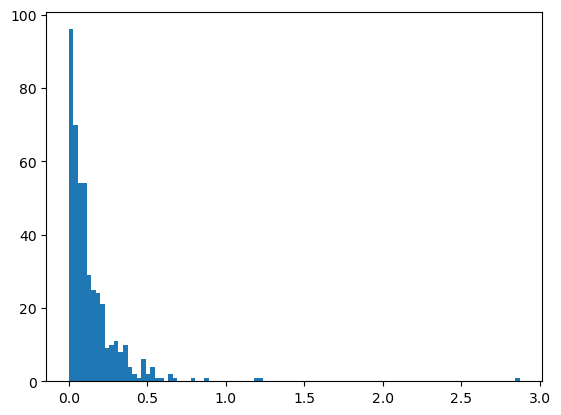

In [8]:
save_programs(programs=program1_corr, path="program1_corr.pkl")

450


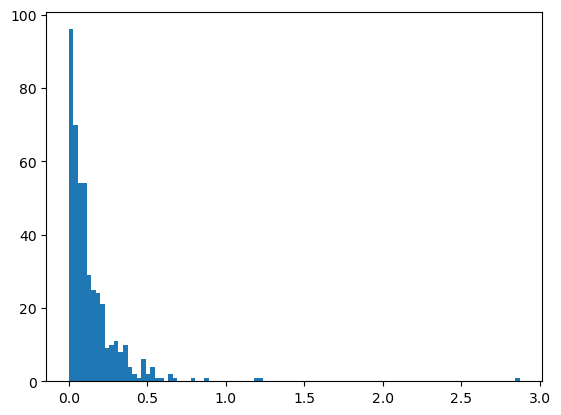

In [11]:
program1_ = aa.fitness_filter(program1_corr, population_size=10000)
print(len(program1_))
show_distribution(program1_)

98780


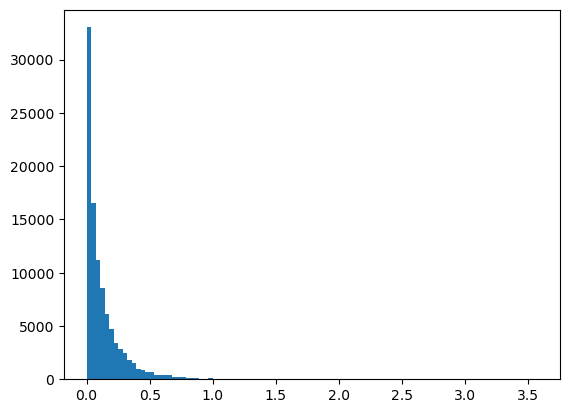

In [12]:
program2 = aa.deepen(parents=program1_, population_size=100000)
print(len(program2))
show_distribution(program2)

In [13]:
print(aa.sort_programs(program2)[0])
aa.sort_programs(program2)[0].indicator["fitness"]

min(ts_regbeta(high, open, 15), -sigmoid(vwap))


3.5731160426225332

In [ ]:
program2_corr = aa.corr_filter(programs=program2, batch_size=2000, threshold=0.7, verbose=True)
print(len(program2_corr))
show_distribution(program2_corr)

In loop 1 : 38499 programs remains, reduce 61.02551123709252% .


In [ ]:
save_programs(programs=program2_corr, path="program2_corr.pkl")

In [5]:
program2_corr = load_programs(path="program2_corr.pkl")

11966


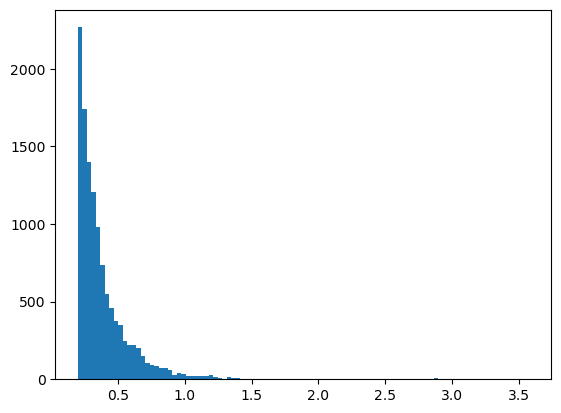

In [11]:
program2_ = aa.fitness_filter(programs=program2_corr, threshold=0.004)
print(len(program2_))
show_distribution(program2_)

In loop 1 : 5439 programs remains, reduce 54.5462142737757% .
In loop 2 : 4661 programs remains, reduce 14.304100018385736% .
3820


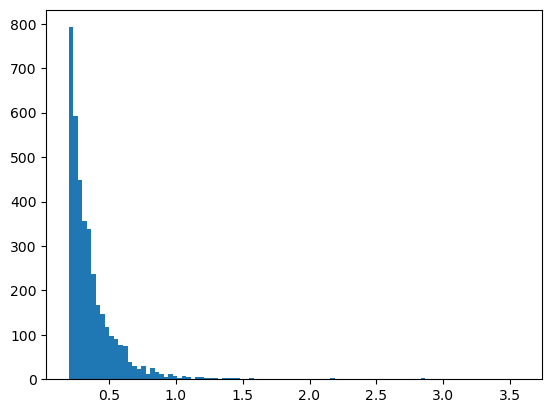

In [13]:
program2_1 = aa.evolve(parents=program2_, population_size=20000, generation=5, tournament_size=5, balance_mode=False)
show_generations_num(program2_1)
show_gen_distribution(program2_1)

In [15]:
save_programs(programs=program2_1[-1], path="2023_05_07/program2_1_4.pkl")

In [16]:
program2_1_4 = load_programs(path="2023_05_07/program2_1_4.pkl")

3820


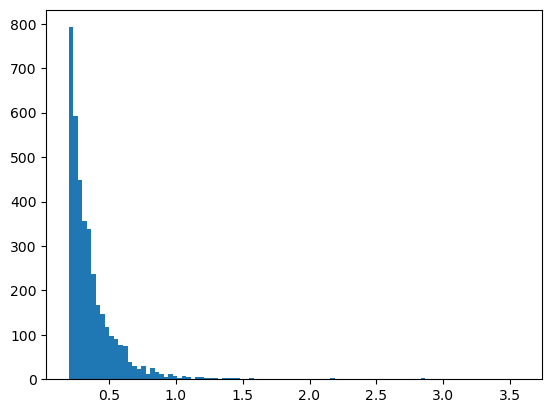

In [17]:
program2_1_4_corr = aa.corr_filter(programs=program2_1_4, batch_size=2000, verbose=True)

Generation0 : 16535          
Generation1 : 17117          
Generation2 : 16884          
Generation3 : 16596          
Generation4 : 16181          


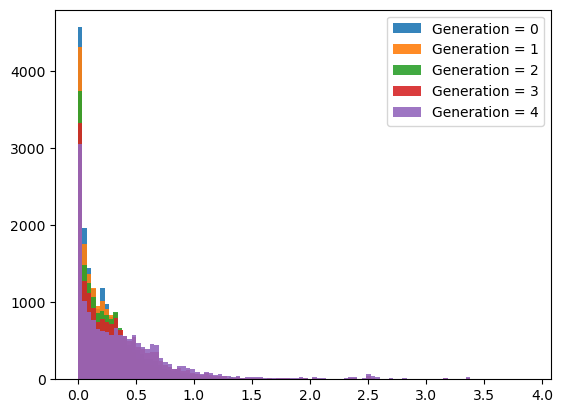

In [18]:
print(len(program2_1_4_corr))
show_distribution(program2_1_4_corr)

In [20]:
save_programs(programs=program2_1_4_corr, path="2023_05_07/program2_1_4_corr.pkl")

In [21]:
program2_1_4_corr = load_programs(path="2023_05_07/program2_1_4_corr.pkl")

In [22]:
program2_2 = aa.evolve(parents=program2_1_4_corr, population_size=20000, generation=5, tournament_size=10, balance_mode=False)
show_generations_num(program2_2)
show_gen_distribution(program2_2)

In loop 1 : 7565 programs remains, reduce 53.24763611643286% .
In loop 2 : 6584 programs remains, reduce 12.967614011896888% .


5430


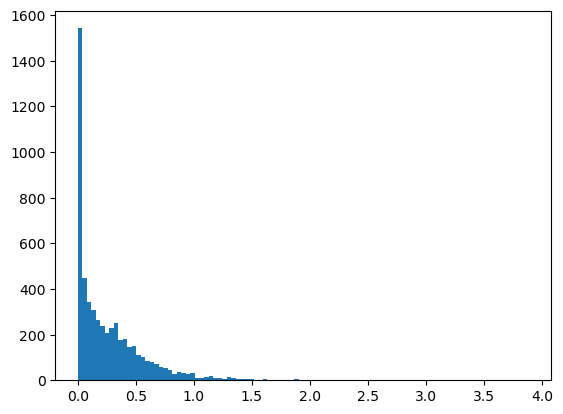

In [23]:
save_programs(programs=program2_2[-1], path="2023_05_07/program2_2_4.pkl")

In [24]:
program2_2_4 = load_programs(path="2023_05_07/program2_2_4.pkl")

In [5]:
program2_2_4_corr = aa.corr_filter(programs=program2_2_4, batch_size=2000, verbose=True)
print(len(program2_2_4_corr))
show_distribution(program2_2_4_corr)

In [9]:
save_programs(programs=program2_2_4_corr, path="2023_05_07/program2_2_4_corr.pkl")

In [5]:
program2_2_4_corr = load_programs(path="2023_05_07/program2_2_4_corr.pkl")

2254


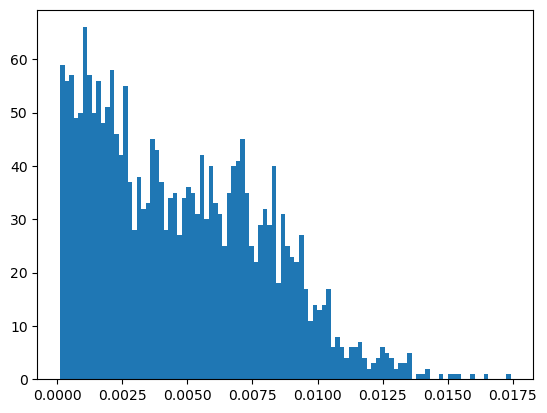

-ts_delay(-div(returns, vwap), 60)
0.017431602226338022


In [6]:
program2_2_4_ = aa.fitness_filter(programs=program2_2_4_corr, threshold=0.0001)
print(len(program2_2_4_))
show_distribution(program2_2_4_)
print(program2_2_4_[0])
print(program2_2_4_[0].indicator["fitness"])

99760


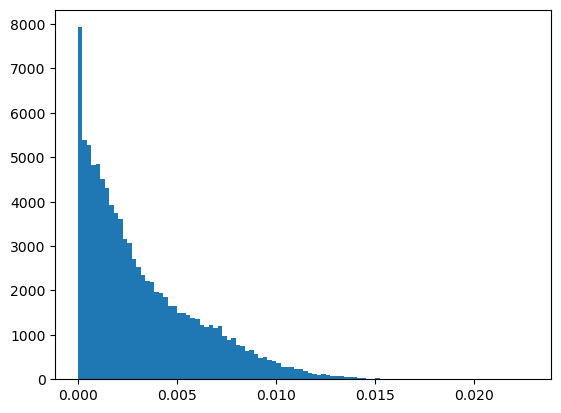

In [7]:
program3 = aa.deepen(parents=program2_2_4_, population_size=100000)
print(len(program3))
show_distribution(program3)
save_programs(programs=program3, path="program3.pkl")

In [6]:
program3 = load_programs(path="program3.pkl")

10460


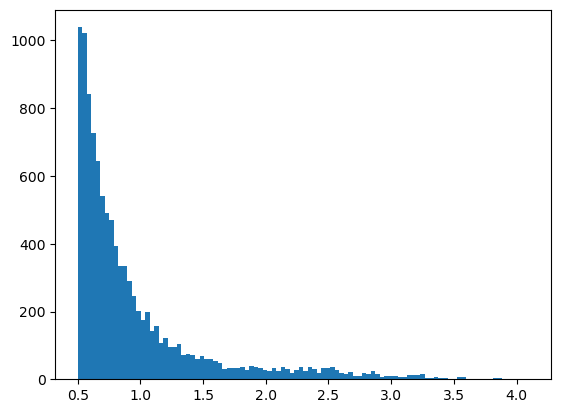

In [13]:
program3_ = aa.fitness_filter(programs=program3, threshold=0.5)
print(len(program3_))
show_distribution(program3_)

In loop 1 : 10325 programs remains, reduce 1.290630975143403% .
10325


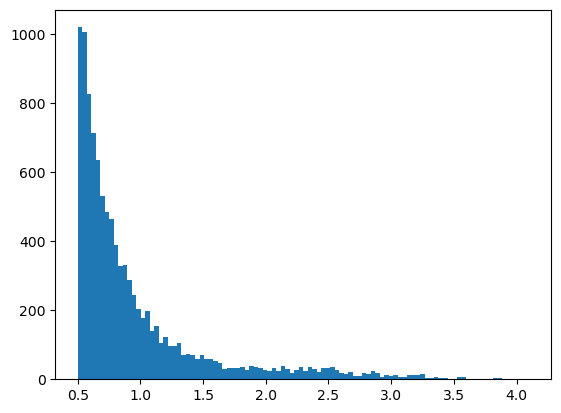

In [14]:
program3_corr = aa.corr_filter(programs=program3_, threshold=2000, verbose=True)
print(len(program3_corr))
show_distribution(program3_corr)

In [15]:
save_programs(programs=program3_corr, path="program3_corr.pkl")

In [17]:
program3_corr = load_programs(path="program3_corr.pkl")

10325


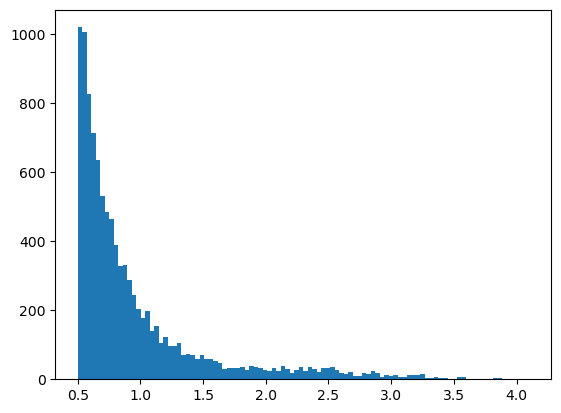

In [18]:
program3_ = aa.fitness_filter(programs=program3_corr, threshold=0.005)
print(len(program3_))
show_distribution(program3_)

Generation0 : 18723          
Generation1 : 17435          
Generation2 : 15911          
Generation3 : 15325          
Generation4 : 15252          


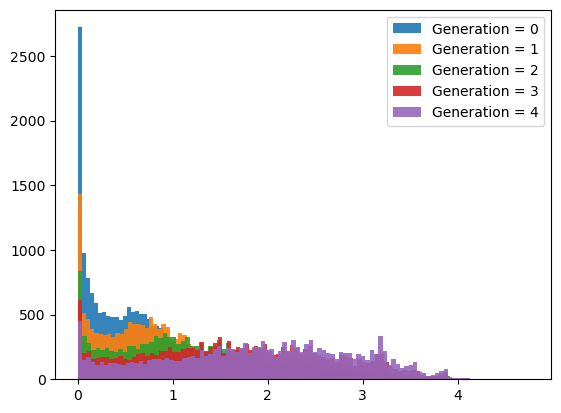

In [19]:
program3_1 = aa.evolve(parents=program3_, population_size=20000, generation=5, tournament_size=5, balance_mode=True, use_parallel=True)
show_generations_num(program3_1)
show_gen_distribution(program3_1)

In [21]:
save_programs(programs=program3_1[-1], path="program3_1_4.pkl")

In [47]:
program3_1_4 = load_programs(path="program3_1_4.pkl")

In loop 1 : 3126 programs remains, reduce 79.50432730133753% .
In loop 2 : 1929 programs remains, reduce 38.29174664107485% .
1645


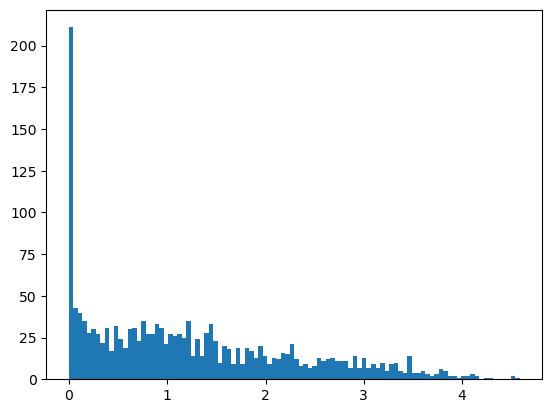

In [51]:
program3_1_4_corr = aa.corr_filter(programs=program3_1_4, batch_size=2000, verbose=True)
print(len(program3_1_4_corr))
show_distribution(program3_1_4_corr)

In [56]:
program3_1_4_corr = aa.sort_programs(program3_1_4_corr)
# program3_1_4_corr.reverse()
save_programs(programs=program3_1_4_corr, path="program3_1_4_corr.pkl")

In [8]:
program3_1_4_corr = load_programs(path="program3_1_4_corr.pkl")
program3_1_4_corr = aa.sort_programs(program3_1_4_corr)

max(ts_corr(-ts_covariance(high, volume, 2), -sigmoid(high), 10), -ts_regbeta(ts_covariance(returns, low, 7), -sigmoid(low), 5))
4.586537039257636


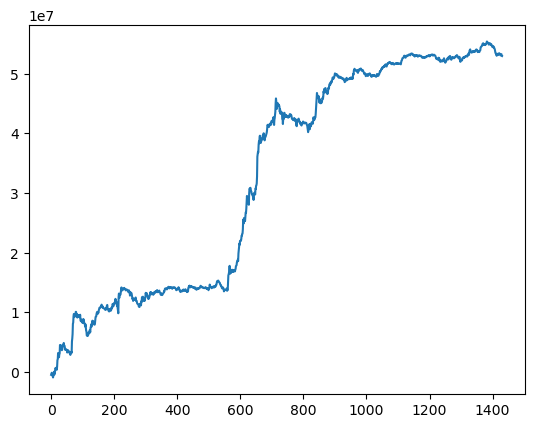

returns    : 0.4665         
ir         : 0.1232         
sharpe     : 1.9556         
turnover   : 0.1272         
draw_down  : 4204418.2334   
fitness    : 3.7450         
[[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ... -0.00000000e+00
   0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ... -0.00000000e+00
   2.85566996e-14 -0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 ... -0.00000000e+00
   2.89972037e-14 -0.00000000e+00]
 ...
 [-0.00000000e+00  0.00000000e+00 -0.00000000e+00 ... -0.00000000e+00
   0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00 -0.00000000e+00 ... -0.00000000e+00
   0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00 -0.00000000e+00 ... -0.00000000e+00
   0.00000000e+00 -0.00000000e+00]]


In [10]:
idx = 0
print(program3_1_4_corr[idx])
print(program3_1_4_corr[idx].indicator["fitness"])
show_back_test(program=program3_1_4_corr[idx], dataset=is_dataset, backtest_func=aa.backtest)
print(program3_1_4_corr[idx].execute(is_dataset))